In [662]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_moons,make_classification,make_regression
import sys
np.random.seed(23)

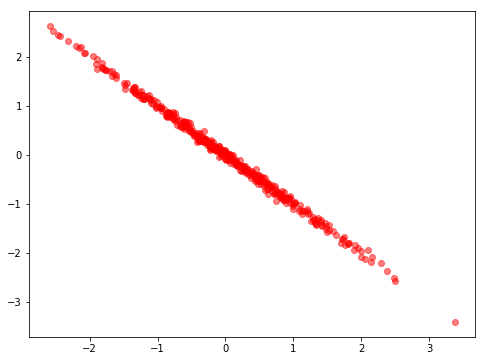

In [626]:
# See the data 
# X, y = make_moons(n_samples=300, noise=0.0)
X,y = make_regression(n_samples=400, n_features=1,noise=5); X = np.concatenate((X,y[:,None]),1) 

# ======== WE ARE CENTERING AND STD =======
X[:,1] = -X[:,1]
X = (X - X.mean(0))/X.std(0)
# ======== WE ARE CENTERING AND STD =======

plt.figure(figsize=(8,6))
# plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
# plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.show()

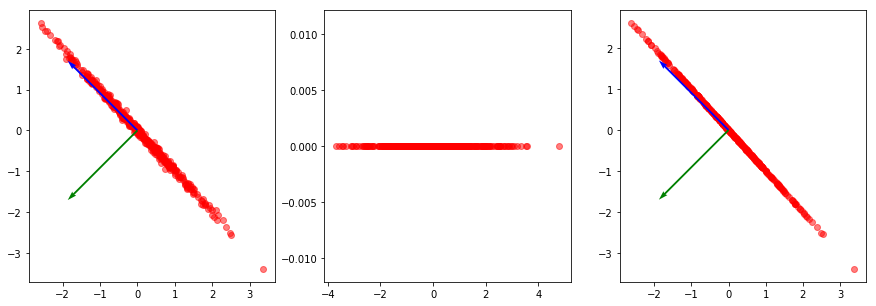

In [627]:
# traditional PCA

# 1. projection
cov = X.T @ X / X.shape[1]
evalue,evector = np.linalg.eig(cov)
idx = np.argsort(evalue)[::-1]
evecs = evector[:,idx]
projected = X @ evecs[:,0]
recovered = projected[:,None] @ evecs[:,0][:,None].T

# 2. recover
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recovered[:, 0], recovered[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

Before :  1.5162748149369187  After :  0.9999999999999999


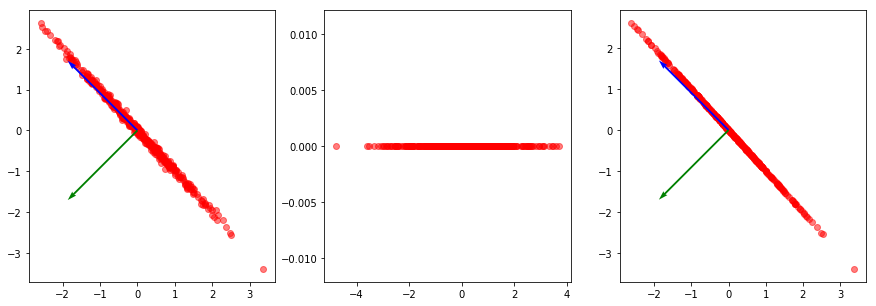

In [634]:
# simple method
w = np.random.randn(2,1)
print('Before : ',np.sqrt(np.sum(w**2)),end=' ')
w = w/(np.sqrt(np.sum(w**2)))
print(' After : ',np.sqrt(np.sum(w**2)))
w = (np.eye(2)+0.5 * X.T @ X ) @ w
w = w/(np.sqrt(np.sum(w**2)))

projected_mine = X @ w
recover_mine   = projected_mine @ w.T

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

In [635]:
print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w)*w)
print(np.sign(evecs[:,0])*evecs[:,0])

True
True
[[0.70666518]
 [0.70754811]]
[0.70710678 0.70710678]


(400, 2)
Iter :  0  Loss:  7.27394065201385
Iter :  20  Loss:  7.273942539592863
Iter :  40  Loss:  7.273944432541032
Iter :  60  Loss:  7.273946326939979
Iter :  80  Loss:  7.273948219771289


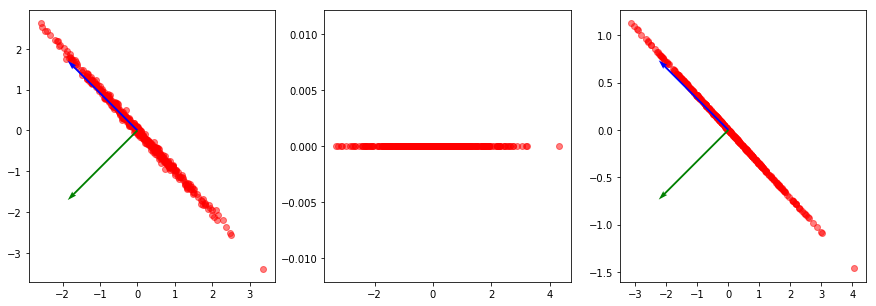

False
False
[[0.9408919]
 [0.338707 ]]
[0.70710678 0.70710678]


In [646]:
# iterative
# w = np.random.uniform(0,1,size=(2,1))
w = np.random.randn(2,1)
w = w/(np.sqrt(np.sum(w**2)))
m = np.zeros_like(w)
temp_X = np.copy(X)
print(temp_X.shape)

for iter in range(100):
    cum_loss = 0
    temp_X   = shuffle(temp_X)
    for mini_batch in range(0,len(X),10):
        current_batch = temp_X[mini_batch:mini_batch+10]
        loss          = current_batch - current_batch@w@w.T
        grad          = (current_batch.T@loss + loss.T @ current_batch) @ w
        m = 0.9 * m + 0.1 * grad
        w = w - 0.00000000001* m
        w = w/(np.sqrt(np.sum(w**2)))
        cum_loss      = cum_loss + (loss**2).mean()
    if iter%20==0:print('Iter : ',iter," Loss: ",cum_loss)

projected_mine = X @ w
recover_mine   = projected_mine @ w.T

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w)*w)
print(np.sign(evecs[:,0])*evecs[:,0])

Iter :  0  Loss:  3.4852698095058905
Iter :  20  Loss:  3.485270814364609
Iter :  40  Loss:  3.4852718210412967
Iter :  60  Loss:  3.4852728287660937
Iter :  80  Loss:  3.4852738358703315


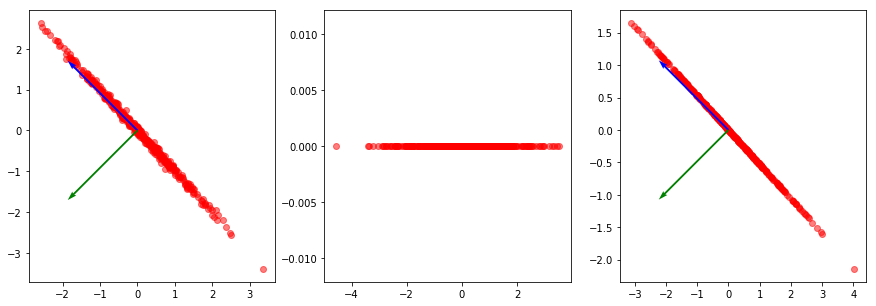

False
False
[[0.88374676]
 [0.46796546]]
[0.70710678 0.70710678]


In [653]:
# iterative
# w = np.random.uniform(0,1,size=(2,1))
w = np.random.randn(2,1)
w = w/(np.sqrt(np.sum(w**2)))
m = np.zeros_like(w)
temp_X = np.copy(X)

for iter in range(100):
    cum_loss = 0
    temp_X   = shuffle(temp_X)
    for mini_batch in range(0,len(X),10):
        current_batch = temp_X[mini_batch:mini_batch+10]
        loss          = current_batch - current_batch@w@w.T
        grad          = (np.eye(2) + current_batch.T @ current_batch ) @ w
        m = 0.9 * m + 0.1 * grad
        w = w - 0.00000000001* m
        w = w/(np.sqrt(np.sum(w**2)))
        cum_loss      = cum_loss + (loss**2).mean()
    if iter%20==0:print('Iter : ',iter," Loss: ",cum_loss)

projected_mine = X @ w
recover_mine   = projected_mine @ w.T

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w)*w)
print(np.sign(evecs[:,0])*evecs[:,0])

Iter :  0  Loss:  1.2322330316050107
Iter :  20  Loss:  1.2322330323457837
Iter :  40  Loss:  1.2322330330886457
Iter :  60  Loss:  1.232233033831337
Iter :  80  Loss:  1.2322330345740173


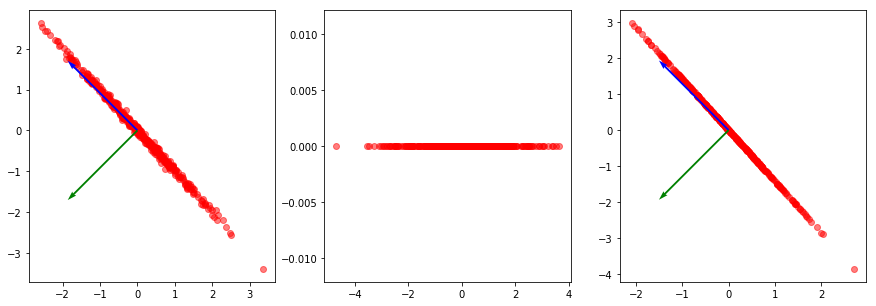

False
False
[[0.57390604]
 [0.81892116]]
[0.70710678 0.70710678]


In [656]:
# iterative
# w = np.random.uniform(0,1,size=(2,1))
w = np.random.randn(2,1)
w = w/(np.sqrt(np.sum(w**2)))
m = np.zeros_like(w)
temp_X = np.copy(X)

for iter in range(100):
    cum_loss = 0
    temp_X   = shuffle(temp_X)
    for mini_batch in range(0,len(X),10):
        current_batch = temp_X[mini_batch:mini_batch+10]
        loss          = current_batch - current_batch@w@w.T
        grad          = (np.eye(2) + current_batch.T @ current_batch ) @ w + (current_batch.T@loss + loss.T @ current_batch) @ w
        m = 0.9 * m + 0.1 * grad
        w = w - 0.00000000000001* m
        w = w/(np.sqrt(np.sum(w**2)))
        cum_loss      = cum_loss + (loss**2).mean()
    if iter%20==0:print('Iter : ',iter," Loss: ",cum_loss)

projected_mine = X @ w
recover_mine   = projected_mine @ w.T

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w)*w)
print(np.sign(evecs[:,0])*evecs[:,0])

In [668]:
# iterative
# w = np.random.uniform(0,1,size=(2,1))
w1 = np.random.randn(2,1)
w2 = np.random.randn(1,1)

w1 = w1/(np.sqrt(np.sum(w1**2)))
w2 = w2/(np.sqrt(np.sum(w2**2)))

temp_X = np.copy(X)

for iter in range(100):
    cum_loss = 0
    temp_X   = shuffle(temp_X)
    for mini_batch in range(0,len(X),10):
        current_batch = temp_X[mini_batch:mini_batch+10]
        
        layer1 = current_batch @ w1
        layer2 = layer1        @ w2
        
        grad2 = (np.eye(1) + layer1.T @ layer1 ) @ w2
        print(grad2.shape)
        sys.exit()
        loss          = current_batch - current_batch@w@w.T
        grad          = (np.eye(2) + current_batch.T @ current_batch ) @ w + (current_batch.T@loss + loss.T @ current_batch) @ w
        m = 0.9 * m + 0.1 * grad
        w = w - 0.00000000000001* m
        w = w/(np.sqrt(np.sum(w**2)))
        cum_loss      = cum_loss + (loss**2).mean()
        
    if iter%20==0:print('Iter : ',iter," Loss: ",cum_loss)

sys.exit()
projected_mine = X @ w
recover_mine   = projected_mine @ w.T

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected_mine,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recover_mine[:, 0], recover_mine[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

print(np.allclose(recover_mine,recovered,atol=0.01))
print(np.allclose(np.sign(w)*w,np.sign(evecs[:,0])*evecs[:,0],atol=0.01))
print(np.sign(w)*w)
print(np.sign(evecs[:,0])*evecs[:,0])

(1, 1)


SystemExit: 

In [419]:
temp = np.random.uniform(size=(5,5))
print(temp)
evalue,evector = np.linalg.eigh(temp)
print(np.diag(temp).sum())
print(evalue.sum())

[[0.89331633 0.68456331 0.25258339 0.82745072 0.29307408]
 [0.47457878 0.91735075 0.54523007 0.07586395 0.99624075]
 [0.65001589 0.28521589 0.88211856 0.18379295 0.85724192]
 [0.40704497 0.11202436 0.04486211 0.78768325 0.11895718]
 [0.98123446 0.293183   0.11991856 0.91142301 0.22079928]]
3.701268163918878
3.7012681639188787


<img src="https://i.imgur.com/Isv9zzD.png" >

# Reference 
1. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 9 April 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-results
2. Python, H., & Eunice, J. (2017). How to make two plots side-by-side using Python. Stack Overflow. Retrieved 9 April 2019, from https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
3. The Theorem that the Sum of the Eigenvalues of a Matrix is Equal to its Trace . (2019). Applet-magic.com. Retrieved 9 April 2019, from http://www.applet-magic.com/eigenvaluestrace.htm
4. 